In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.externals import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore
import pandas_profiling
import pickle
%matplotlib inline
import plotly.offline as py

In [3]:
dataframe=pd.read_csv('/content/drive/MyDrive/Data-Science-ML-Capstone-Projects-master/temperature.csv')

In [4]:
dataframe.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [6]:
dataframe.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [7]:
dataframe.shape

(7752, 25)

<Figure size 432x288 with 0 Axes>

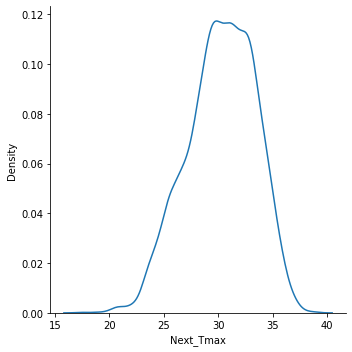

<Figure size 432x288 with 0 Axes>

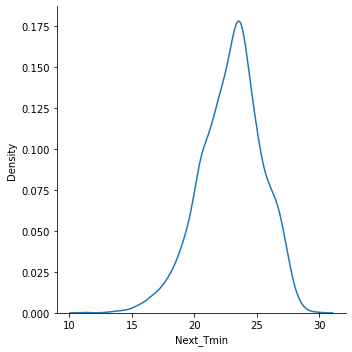

30.274886731391593
3.128010057855773
22.93222006472492
2.487612771331068


In [8]:
for col in ["Next_Tmax","Next_Tmin"]:
    plt.figure()
    sns.displot(dataframe[col],kind='kde')
    plt.show()
print(dataframe["Next_Tmax"].mean())
print(dataframe["Next_Tmax"].std())
print(dataframe["Next_Tmin"].mean())
print(dataframe["Next_Tmin"].std())

In [9]:
dataframe=dataframe.drop('Date',axis=1)

In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null   float64


In [12]:
dataframe['station']=dataframe['station'].fillna(dataframe['station'].mean())
dataframe['Present_Tmax']=dataframe['Present_Tmax'].fillna(dataframe['Present_Tmax'].mean())
dataframe['Present_Tmin']=dataframe['Present_Tmin'].fillna(dataframe['Present_Tmin'].mean())
dataframe['LDAPS_RHmin']=dataframe['LDAPS_RHmin'].fillna(dataframe['LDAPS_RHmin'].mean())
dataframe['LDAPS_RHmax']=dataframe['LDAPS_RHmax'].fillna(dataframe['LDAPS_RHmax'].mean())
dataframe['LDAPS_Tmax_lapse']=dataframe['LDAPS_Tmax_lapse'].fillna(dataframe['LDAPS_Tmax_lapse'].mean())
dataframe['LDAPS_Tmin_lapse']=dataframe['LDAPS_Tmin_lapse'].fillna(dataframe['LDAPS_Tmin_lapse'].mean())
dataframe['LDAPS_WS']=dataframe['LDAPS_WS'].fillna(dataframe['LDAPS_WS'].mean())
dataframe['LDAPS_LH']=dataframe['LDAPS_LH'].fillna(dataframe['LDAPS_LH'].mean())
dataframe['LDAPS_CC1']=dataframe['LDAPS_CC1'].fillna(dataframe['LDAPS_CC1'].mean())
dataframe['LDAPS_CC2']=dataframe['LDAPS_CC2'].fillna(dataframe['LDAPS_CC2'].mean())
dataframe['LDAPS_CC3']=dataframe['LDAPS_CC3'].fillna(dataframe['LDAPS_CC3'].mean())
dataframe['LDAPS_CC4']=dataframe['LDAPS_CC4'].fillna(dataframe['LDAPS_CC4'].mean())
dataframe['LDAPS_PPT1']=dataframe['LDAPS_PPT1'].fillna(dataframe['LDAPS_PPT1'].mean())
dataframe['LDAPS_PPT2']=dataframe['LDAPS_PPT2'].fillna(dataframe['LDAPS_PPT2'].mean())
dataframe['LDAPS_PPT3']=dataframe['LDAPS_PPT3'].fillna(dataframe['LDAPS_PPT3'].mean())
dataframe['LDAPS_PPT4']=dataframe['LDAPS_PPT4'].fillna(dataframe['LDAPS_PPT4'].mean())
dataframe['Next_Tmax']=dataframe['Next_Tmax'].fillna(dataframe['Next_Tmax'].mean())
dataframe['Next_Tmin']=dataframe['Next_Tmin'].fillna(dataframe['Next_Tmin'].mean())

In [13]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Present_Tmax      7752 non-null   float64
 2   Present_Tmin      7752 non-null   float64
 3   LDAPS_RHmin       7752 non-null   float64
 4   LDAPS_RHmax       7752 non-null   float64
 5   LDAPS_Tmax_lapse  7752 non-null   float64
 6   LDAPS_Tmin_lapse  7752 non-null   float64
 7   LDAPS_WS          7752 non-null   float64
 8   LDAPS_LH          7752 non-null   float64
 9   LDAPS_CC1         7752 non-null   float64
 10  LDAPS_CC2         7752 non-null   float64
 11  LDAPS_CC3         7752 non-null   float64
 12  LDAPS_CC4         7752 non-null   float64
 13  LDAPS_PPT1        7752 non-null   float64
 14  LDAPS_PPT2        7752 non-null   float64
 15  LDAPS_PPT3        7752 non-null   float64
 16  LDAPS_PPT4        7752 non-null   float64


In [15]:
X = dataframe.drop(['Next_Tmax','Next_Tmin'],axis=1)
y_max = dataframe["Next_Tmax"]
y_min = dataframe["Next_Tmin"]

In [21]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor(),RandomForestRegressor()]
max_s=0
for r_s in range(40,90):
  X_train,X_test,y_train,y_test=train_test_split(X,y_max,test_size=0.2,random_state=r_s)
  for i in model:
    i.fit(X_train,y_train)
    pre=i.predict(X_test)
    r2_sc= r2_score(y_test,pre)
    if r2_sc>max_s:
      max_s=r2_sc
      final_State= r_s
      final_model=i
print()
print()

print("Max Score is ",max_s,"  For Random State ",final_State," and model is ", final_model )



Max Score is  0.9120505916599979   For Random State  59  and model is  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y_max,test_size=0.2,random_state=59)

In [35]:
model_B= RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
model_B.fit(X_train,y_train)
pred=model_B.predict(X_test)
Scor= r2_score(y_test,pred)
print(Scor)

0.9122550805464298


In [37]:
pickle.dump(model_B, open('Max_Temp_m.pkl', 'wb'))

In [38]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_s=0
for r_s in range(40,90):
  X_train,X_test,y_train,y_test=train_test_split(X,y_min,test_size=0.2,random_state=r_s)
  for i in model:
    i.fit(X_train,y_train)
    pre=i.predict(X_test)
    r2_sc= r2_score(y_test,pre)
    if r2_sc>max_s:
      max_s=r2_sc
      final_State= r_s
      final_model=i
print()
print()

print("Max Score is ",max_s,"  For Random State ",final_State," and model is ", final_model )



Max Score is  0.892396822867556   For Random State  42  and model is  GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [39]:
model=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
 X_train,X_test,y_train,y_test=train_test_split(X,y_min,test_size=0.2,random_state=42)

In [41]:
model.fit(X_train,y_train)
pred=model.predict(X_test)
Scor= r2_score(y_test,pred)
print(Scor)

0.892396822867556


In [42]:
pickle.dump(model, open('min_Temp_m.pkl', 'wb'))